# Assignment #4: Forecasting of time series based on differencing data

---


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [3]:
path = 'AirPassengers.csv'
df = pd.read_csv(path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


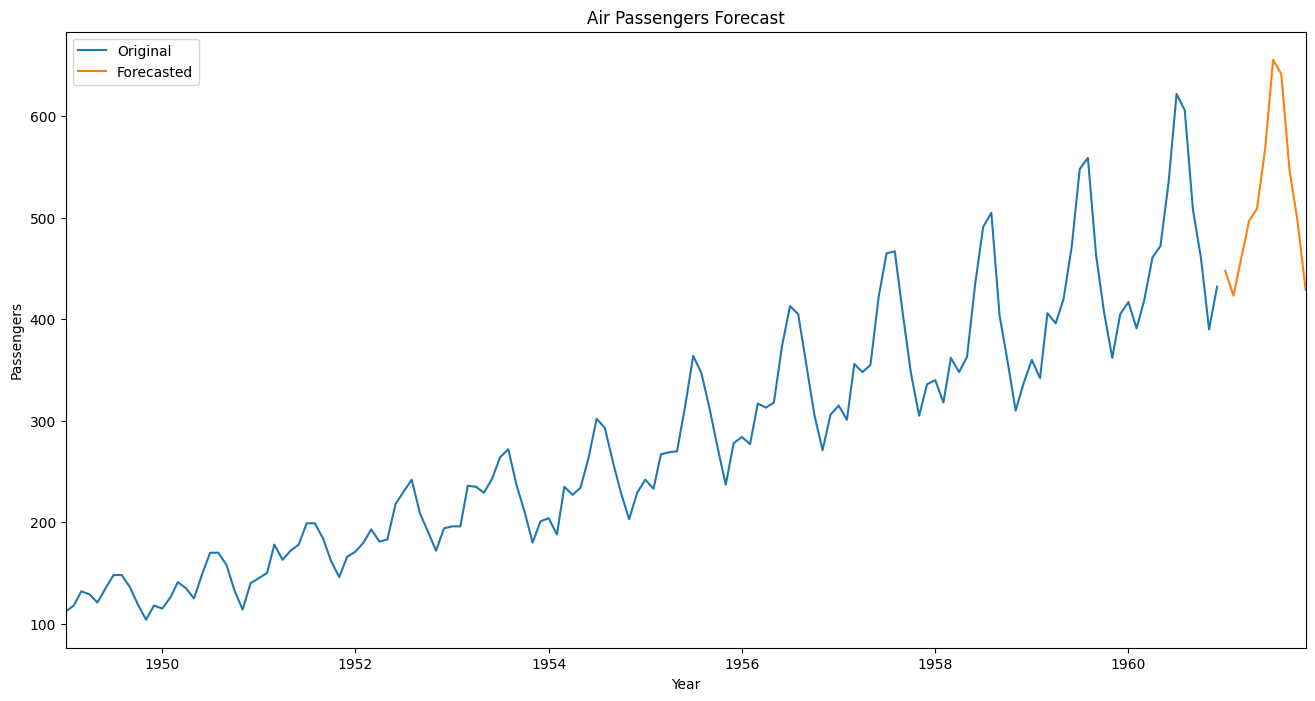

In [8]:
df = pd.read_csv(path, header=0, index_col=0)
df.index = pd.to_datetime(df.index)

#Differencing
df_diff = df.diff().dropna()

#Fitting the model and forecasting using ARIMA
model = sm.tsa.statespace.SARIMAX(df_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
forecast = results.forecast(steps=12)

#Creating forecast dataframe
df_forecast = pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=12, freq='MS'))
df_forecast['#Passengers'] = df['#Passengers'].iloc[-1] + forecast.cumsum()

#Plotting original data and forecasted data
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(df.index, df['#Passengers'], label='Original')
ax.plot(df_forecast.index, df_forecast['#Passengers'], label='Forecasted')

#Optimizing the x axis
ax.set_xlim([df.index[0], df_forecast.index[-1]])

#Lables and legend
ax.set_xlabel('Year')
ax.set_ylabel('Passengers')
ax.set_title('Air Passengers Forecast')
ax.legend()
plt.show()

### Here we can clearly see that the SARIMA model, intuitively seems to make an accurate prediction of the future values.

